Physics 474 - Spring 2023 <br>
Homework 1 

<font color='red'>Author: Djamil Lakhdar-Hamina
   

_________________________________________________________________________________
In this homework we will practice fitting a function with parameters to some data.

skills we will excercise:
- reading in data
- plotting data
- writing user defined functions
- fitting a function to data with 'curve_fit'
- calculating $\chi^2$ and $\chi^2$ probaility
- plotting residuals
- analyzing data and making observations

The data we will be using is global temperature data compiled from 
The current citation for this dataset is: 
 
    Rohde, R. A. and Hausfather, Z.: The Berkeley Earth Land/Ocean Temperature
    Record, Earth Syst. Sci. Data, 12, 3469�3479, 
    https://doi.org/10.5194/essd-12-3469-2020, 2020.

 Data is: year, month, delta_T(C), T_error(C)
 
 where delta_T = Temp - (Jan 1951-Dec 1980 global mean temperature)
 
 Estimated Jan 1951-Dec 1980 global mean temperature (C)
   Using air temperature above sea ice:   14.105 +/- 0.022

The data is provided in a comma-separated-value file named 'global_temps_datafile.csv'

Note that the temperature data is provided as a $\Delta T$ from the global mean 1951-1980 temperature
of

$T_{mean}^{51-80}= 14.105 \pm 0.022 \, ^{\circ}C$
________________________________________________________________________________

Part 1) (1 pt)

Read in the data file and print the shape of the file



In [1]:
#Your code here...
import numpy as np
import pandas as pd 
from scipy.optimize import curve_fit
import scipy.stats as st    #for chi-squared probability
import matplotlib.pyplot as plt 

## define useful functions

#######################################################################################


line=lambda x,m,b:m*x+b  

poly2d= lambda x,m,b,c:m*x**2+b*x+c  

sqrt=lambda n: n**(1/2)

def quadature_error(error:pd.core.series.Series
                    ,average_error:pd.core.series.Series,
                    systematic_error:pd.core.series.Series)->pd.core.series.Series:
    """
    calculates the quadrature error for a pandas series column 
    
    """
    
    return sqrt(error**2+average_error**2+systematic_error**2)


def chi_squared(theory:np.array,data:np.array,sigma:np.array)->np.array:
    """
    This function calculates TOTAL chi-squared between Theory and Data using sigma 
    as errors.
    The 3 arrays must be of equal size.
    Note: This is NOT reduced chi-squared
    Usage:  
     inputs: theory = input hypothesis (or Theory)
             data = Data points
             sigma = uncertainty on data points
     output: if arrays are of equal size returns the TOTAL chi-squared
             if arrays are not of equal size returns -1.0
    """
    if np.size(theory)==np.size(data) and np.size(data)==np.size(sigma):
        return np.sum((theory-data)**2/sigma**2)
    else:
        print('error - arrays of unequal size')
        return -1.
        
#######################################################################################

## read in data 
df=pd.read_csv('data/global_temps_datafile.csv',names=['year','month','delta_T','T_error'])
print(f"shape of data is: {df.shape}")

shape of data is: (2074, 4)


____________________________________________________
Part 2) (4 pts)

Plot 
- the data points with errorbars vs year.
- a horizontal line at $T_{mean}^{51-80}= 14.105 \, ^{\circ}C$
- suggestion: use "alpha=0.2" in plotting data points

About errors: There are three errors that need to be added in quadrature
- the error on each of the measurements $\sigma_T$ from the file
- error on the $T_{mean}^{51-80}$ of $\sigma_{T_{mean}} = 0.022$
- a random systematic error of $\sigma_{sys}=0.13$

Recall from lecture then 

$\sigma_{tot}^2 = \sigma_T^2 + \sigma_{T_{mean}}^2 + \sigma_{sys}^2$

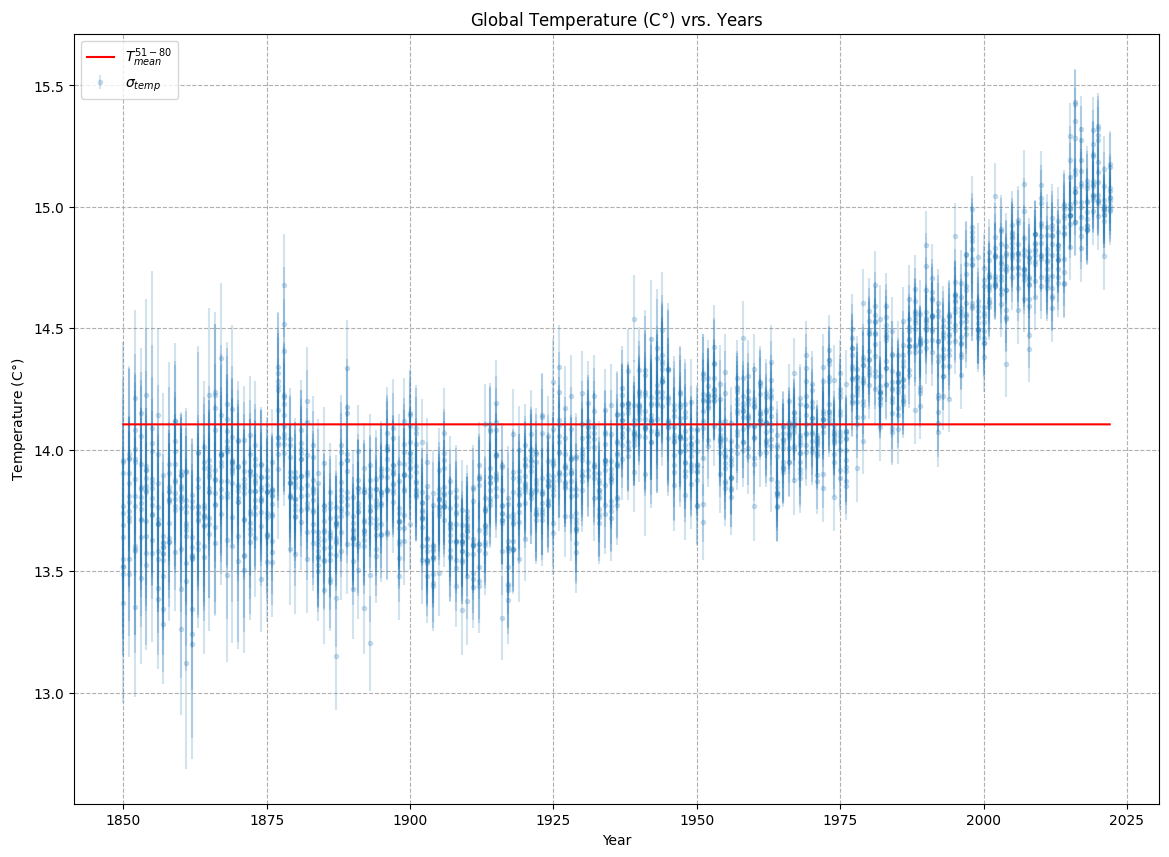

In [2]:
## some constants that will be used 
average_temp=14.105
average_error=.022
systematic_error=.13

## produce temperature column from equation T_delta=Temp-Temp_average -> T_delta+Temp_average=Temp and add 
## errors in quadrature, add these new quantities to our dataframe

df['temp']=df.delta_T+average_temp
df['total_error']=quadature_error(df.T_error,average_error,systematic_error)

## plot 1) data points with errorbars, plot a horizontal line for average 

plt.figure(figsize=(14,10))
plt.errorbar(df.year,df.temp, yerr=df.total_error,fmt='.',label='$\sigma_{temp}$',alpha=.2)
T_mean_post=np.zeros(df.shape[0])
T_mean_post.fill(average_temp)
plt.plot(df.year,T_mean_post,label='$T_{mean}^{51-80}$',color='red')
plt.legend(loc=2)
plt.grid(linestyle='--')
plt.title('Global Temperature (C$\degree$) vrs. Years')
plt.xlabel('Year')
plt.ylabel('Temperature (C$\degree$)')
plt.show()

_________________________________________________________
Part 2 Observations:

The data suggests that around 1975 we see an appreciable increase in average global temperatures. Not only, do we see a secular increase overall, but the error for the period of that secular increase is gaussian-like, that is not as spread and more centrally-located, suggesting that errors are random. Furthermore it seems there is also a cyclical component to the curve, most likely attributable not only to randomn error but to the fact of seasons.


__________________________________________________________

_____________________________________________________________________________
Part 3a) (2 pts)

Fit a straight-line (i.e. first-order polynomial) to the data using 'curve_fit' from some point
starting after the pre-industrial era (i.e. sometime after 1900). You might try after
1900, 1925, 1950, 1980...

sometime after 1900 but before the visible rise around 1980.



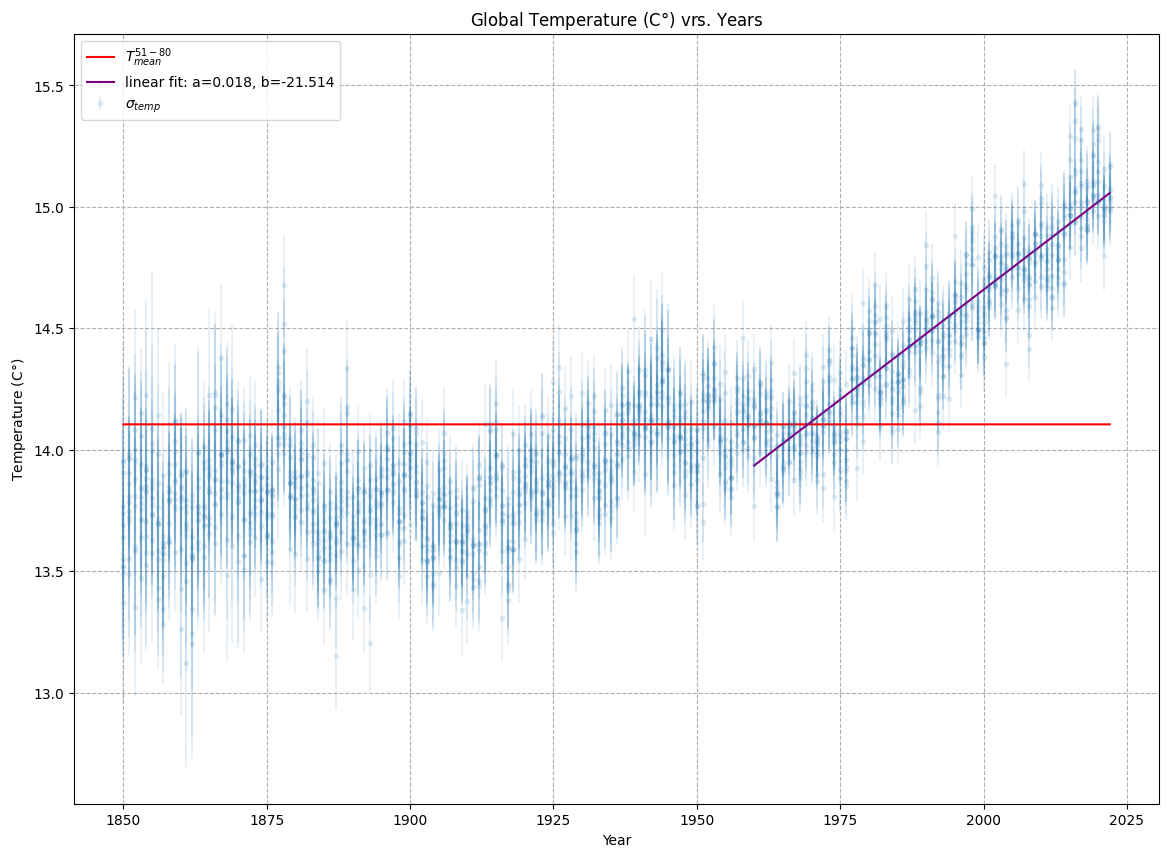

In [3]:
## define a subset of data from 1960 onward 
industrial_df=df[(df.year>=1960)]

# initialize parameters , then curve fit using line function 
p0 = 0,0
poptl, pcovl=curve_fit(line,industrial_df.year,industrial_df.temp,p0,sigma=industrial_df.total_error,absolute_sigma=True)

## plot straght line from 1960 onward + average temperature =
plt.figure(figsize=(14,10))
plt.errorbar(df.year,df.temp, yerr=df.total_error,fmt='.',label='$\sigma_{temp}$',alpha=.1)
plt.plot(df.year,T_mean_post,label='$T_{mean}^{51-80}$',color='red')
plt.plot(industrial_df.year, line(industrial_df.year, *poptl), 'purple',
         label='linear fit: a=%5.3f, b=%5.3f' % tuple(poptl))# plt.plot(df.year,df.total_error)
plt.grid(linestyle='--')
plt.title('Global Temperature (C$\degree$) vrs. Years')
plt.xlabel('Year')
plt.ylabel('Temperature (C$\degree$)')
plt.legend(loc=2)
plt.show()

__________________________________________________________
Part 3b) (3 pts)

1) Calculate and output the $\chi^2$, dof, and $\chi^2$ probability for the fit

2) Plot
- the data with errorbars for the entire range of years
- the best fit line over the years for the fit
- put labels on the data, fit, axes, etc...

chi-squared is: 828.3747839500234
dof is: 752
χ-mu is: 752
prob is: 0.027212741972019647


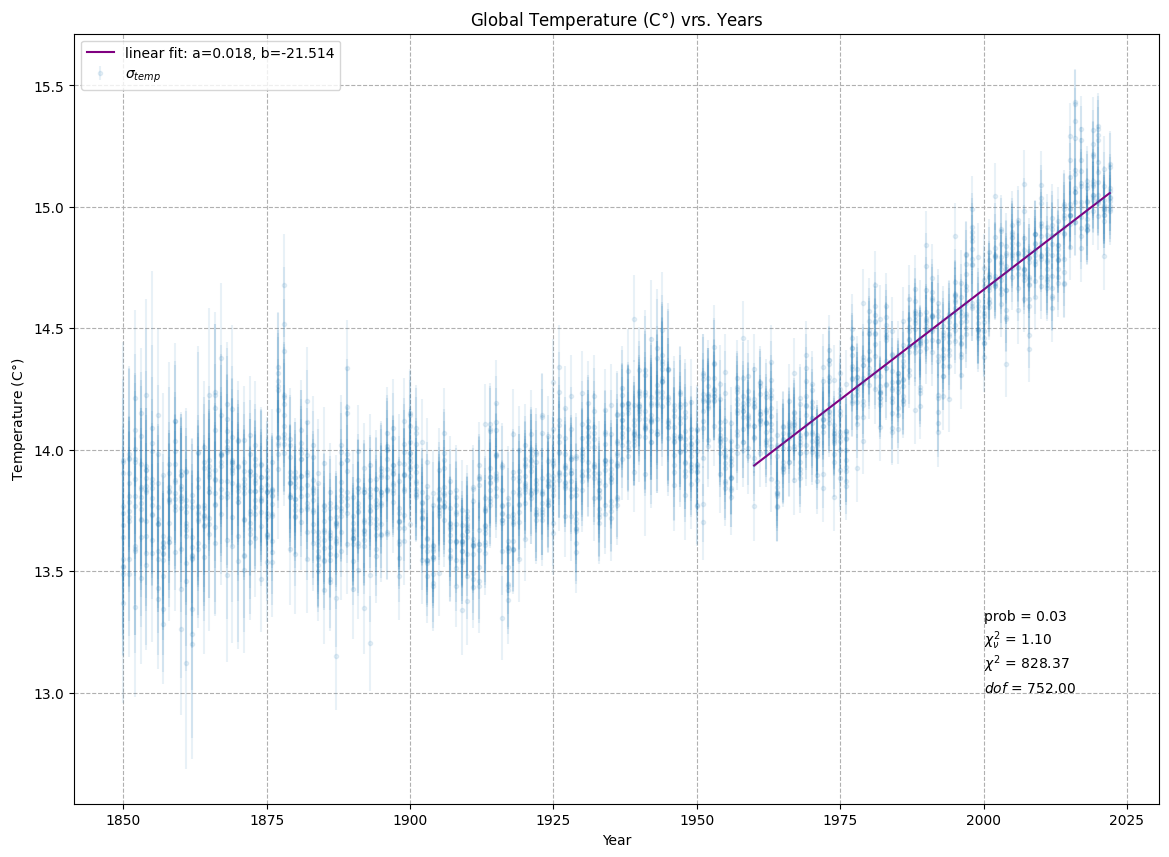

In [4]:
#get chi-squared and prob
chi2=chi_squared(line(industrial_df.year,*poptl),industrial_df.temp,industrial_df.total_error)
dof = np.size(industrial_df.temp)-2  #degrees of freedom = data points - #parameters (here 2)
prob = st.chi2.sf(chi2,dof) #chi-squared probability from scipy function

print(f"chi-squared is: {chi2}")
print(f"dof is: {dof}")
print(f"χ-mu is: {dof}")
print(f"prob is: {prob}")

# We will Plot data with error bars and put best fit line on plot
plt.figure(figsize=(14,10))
plt.errorbar(df.year,df.temp,yerr=df.total_error,fmt='.',label='$\sigma_{temp}$', alpha=.1)
plt.plot(industrial_df.year,line(industrial_df.year,*poptl),label='linear fit: a=%5.3f, b=%5.3f'%tuple(poptl),color='purple')
plt.grid(linestyle='--')
plt.title('Global Temperature (C$\degree$) vrs. Years')
plt.xlabel('Year')
plt.ylabel('Temperature (C$\degree$)')
plt.legend(loc=2)
plt.text(2000,13,r'$dof$ = {:.2f}'.format(dof))
plt.text(2000,13.1,r'$\chi^2$ = {:.2f}'.format(chi2))
plt.text(2000,13.2,r'$\chi_\nu^2$ = {:.2f}'.format(chi2/dof))
plt.text(2000,13.3,r'prob = {:.2f}'.format(prob))
plt.show()

_____________________________________________________________
Part 3 Observations: (will depend on range used for linear fit)

Despite the fact that the linear fit is the most basic model, the chi-squared gives us a probability that suggests the probability that the deviations, or error, are due to chance alone is .03. Error therefore owes to the line itself. This is a poor fit and does not lend support,  to the hypothesis that there has been a secular *linear* increase in average global temperatures past circa 1975. 

_____________________________________________________________

_____________________________________________________________________________
Part 4a) (2 pts)

Fit a Quadratic (i.e. second-order polynomial) to the data using 'curve_fit' ffor the entire range of years


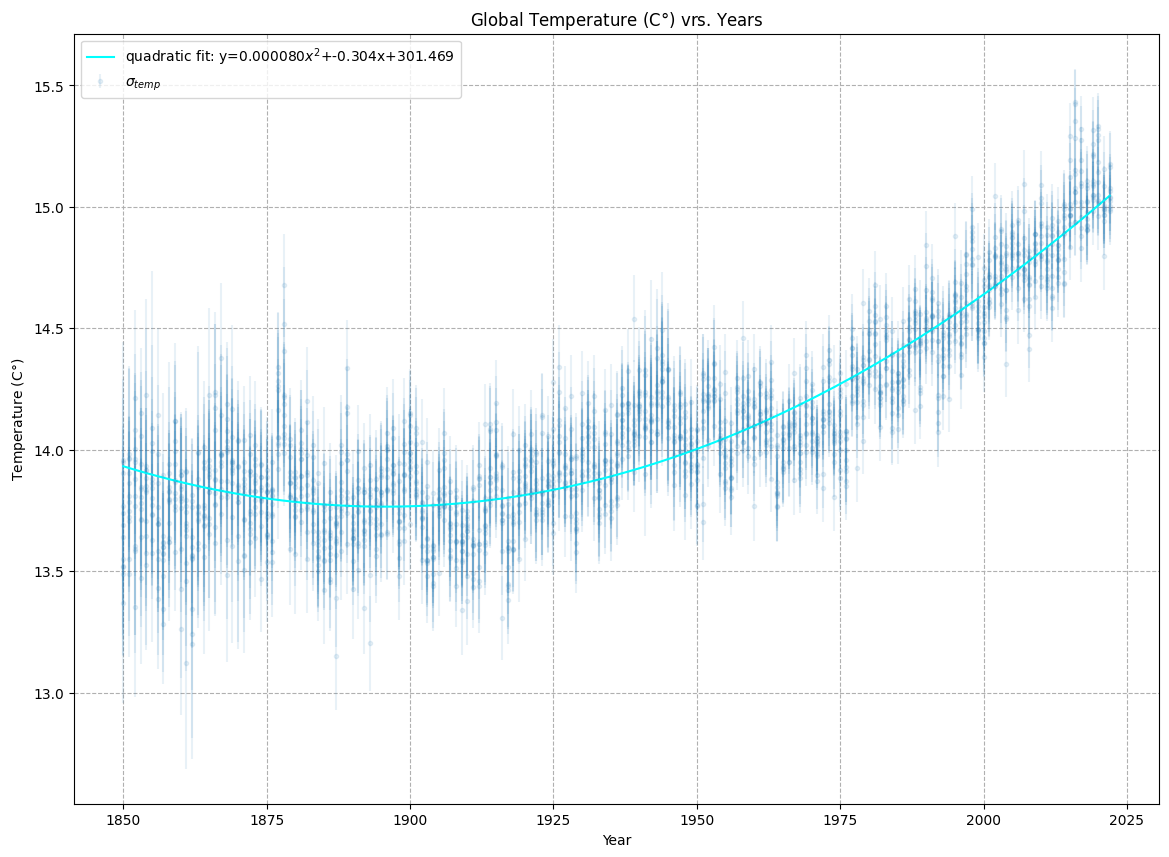

In [5]:
# initialize parameters , then curve fit using line function 
p0=0,0,0
poptq, pcovq=curve_fit(poly2d,df.year,df.temp,p0,sigma=df.total_error,absolute_sigma=True)

# plot 1) quadratic for all years 
plt.figure(figsize=(14,10))
plt.errorbar(df.year,df.temp, yerr=df.total_error,fmt='.',label='$\sigma_{temp}$',alpha=.1)
plt.plot(df.year, poly2d(df.year, *poptq), 
         label='quadratic fit: y=%6f$x^2$+%5.3fx+%5.3f' % tuple(poptq),color='cyan')# plt.plot(df.year,df.total_error)
plt.xlabel('Year')
plt.ylabel('Temperature (C$\degree$)')
plt.title('Global Temperature (C$\degree$) vrs. Years')
plt.legend(loc=2)
plt.grid(linestyle='--')
plt.show()

__________________________________________________________
Part 4b) (3 pts)

1) Calculate and output the $\chi^2$, dof, and $\chi^2$ probability for the fit

2) Plot
- the data with errorbars for the entire range of years
- the best fit quadratic over the entire range of years
- put labels on the data, fit, axes, etc...

chi-squared is: 1999.0344851662394
dof is: 2071
χ-mu is: 0.9652508378398066
prob is: 0.8688628257026999


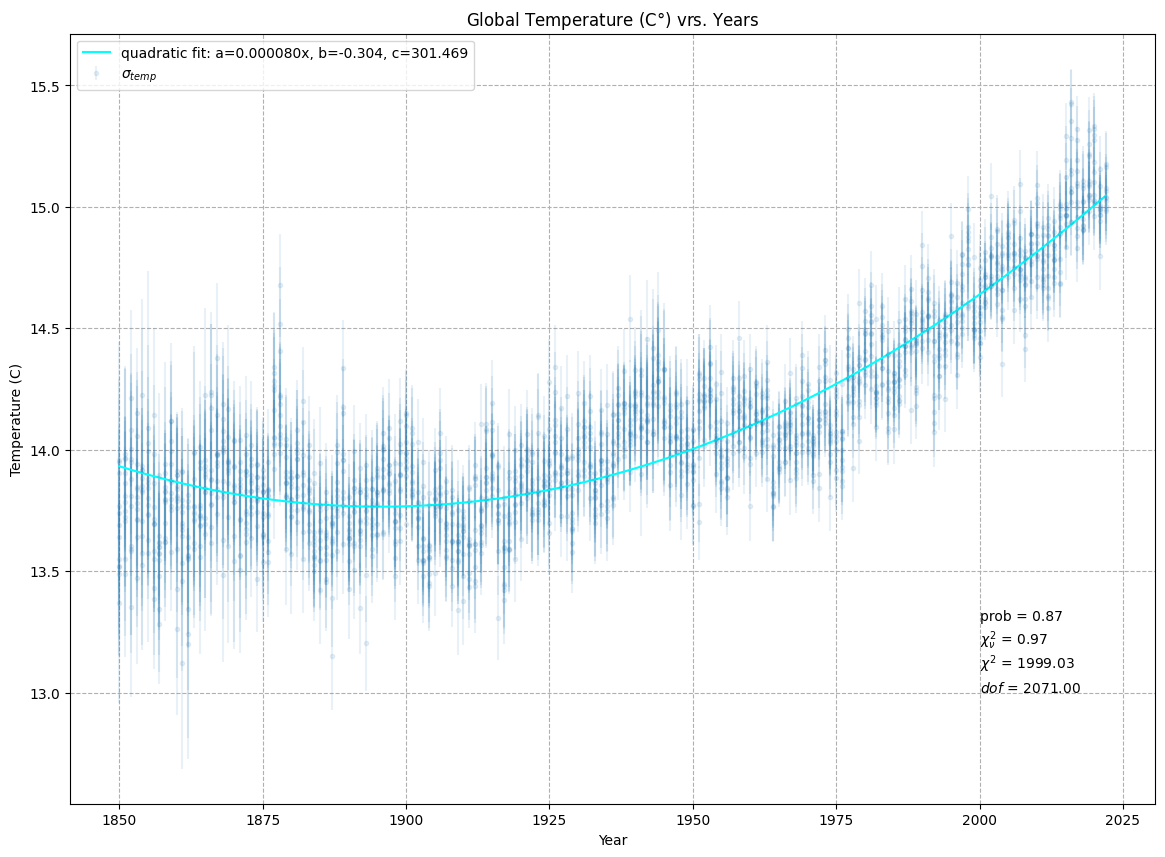

In [6]:
#get chi-squared and prob
chi2=chi_squared(poly2d(df.year,*poptq),df.temp,df.total_error)
dof = np.size(df.temp)-3#degrees of freedom = data points - #parameters (here 3)
prob = st.chi2.sf(chi2,dof) #chi-squared probability from scipy function

print(f"chi-squared is: {chi2}")
print(f"dof is: {dof}")
print(f"χ-mu is: {chi2/dof}")
print(f"prob is: {prob}")

# We will Plot data with error bars and put best fit line on plot
plt.figure(figsize=(14,10))
plt.errorbar(df.year,df.temp,yerr=df.total_error,fmt='.',label='$\sigma_{temp}$', alpha=.1)
plt.plot(df.year,poly2d(df.year,*poptq),label='quadratic fit: a=%6fx, b=%5.3f, c=%5.3f'%tuple(poptq),color='cyan')
plt.grid(linestyle='--')
plt.title('Global Temperature (C$\degree$) vrs. Years')
plt.xlabel('Year')
plt.ylabel('Temperature (C)')
plt.legend(loc=2)
plt.text(2000,13,r'$dof$ = {:.2f}'.format(dof))
plt.text(2000,13.1,r'$\chi^2$ = {:.2f}'.format(chi2))
plt.text(2000,13.2,r'$\chi_\nu^2$ = {:.2f}'.format(chi2/dof))
plt.text(2000,13.3,r'prob = {:.2f}'.format(prob))
plt.show()

_____________________________________________________________
Part 4 Observations:

The model is a much better fit than the linear fit (although there are differences in ranges of years used). The probability that errors are due to chance is very close to .86. Any error we see, owes to the sort of random errors we would expect in any series of measurements, and not to the "introduction of error" by our model, or fit. This lends support to the hypothesis that there has been a quadratic increase in average global temperatures. 

Physically, between 1850-1900 we see that pollution probably acted as a shield for solar radiation therefore accounting for the slight decrease in average global temperatures. However, past 1900 , the pollution then acts like a hothouse or greehouse , significantly containing solar radiation which itself reflects back off this blanket of pollution. Since then we have seen an increase although in a quadratic and non-linear fashion. 


_____________________________________________________________

Part 5: (2 pts)

Make 2 subplots (2 rows x 1 column)
- top: residuals with errorbars for the straight-line fit for years used in the fit
- bottom: residuals with errorbars for quadratic fit for years used in the fit

Use the same limits on the x-axis for both 1850-2025

______________________________________________________________

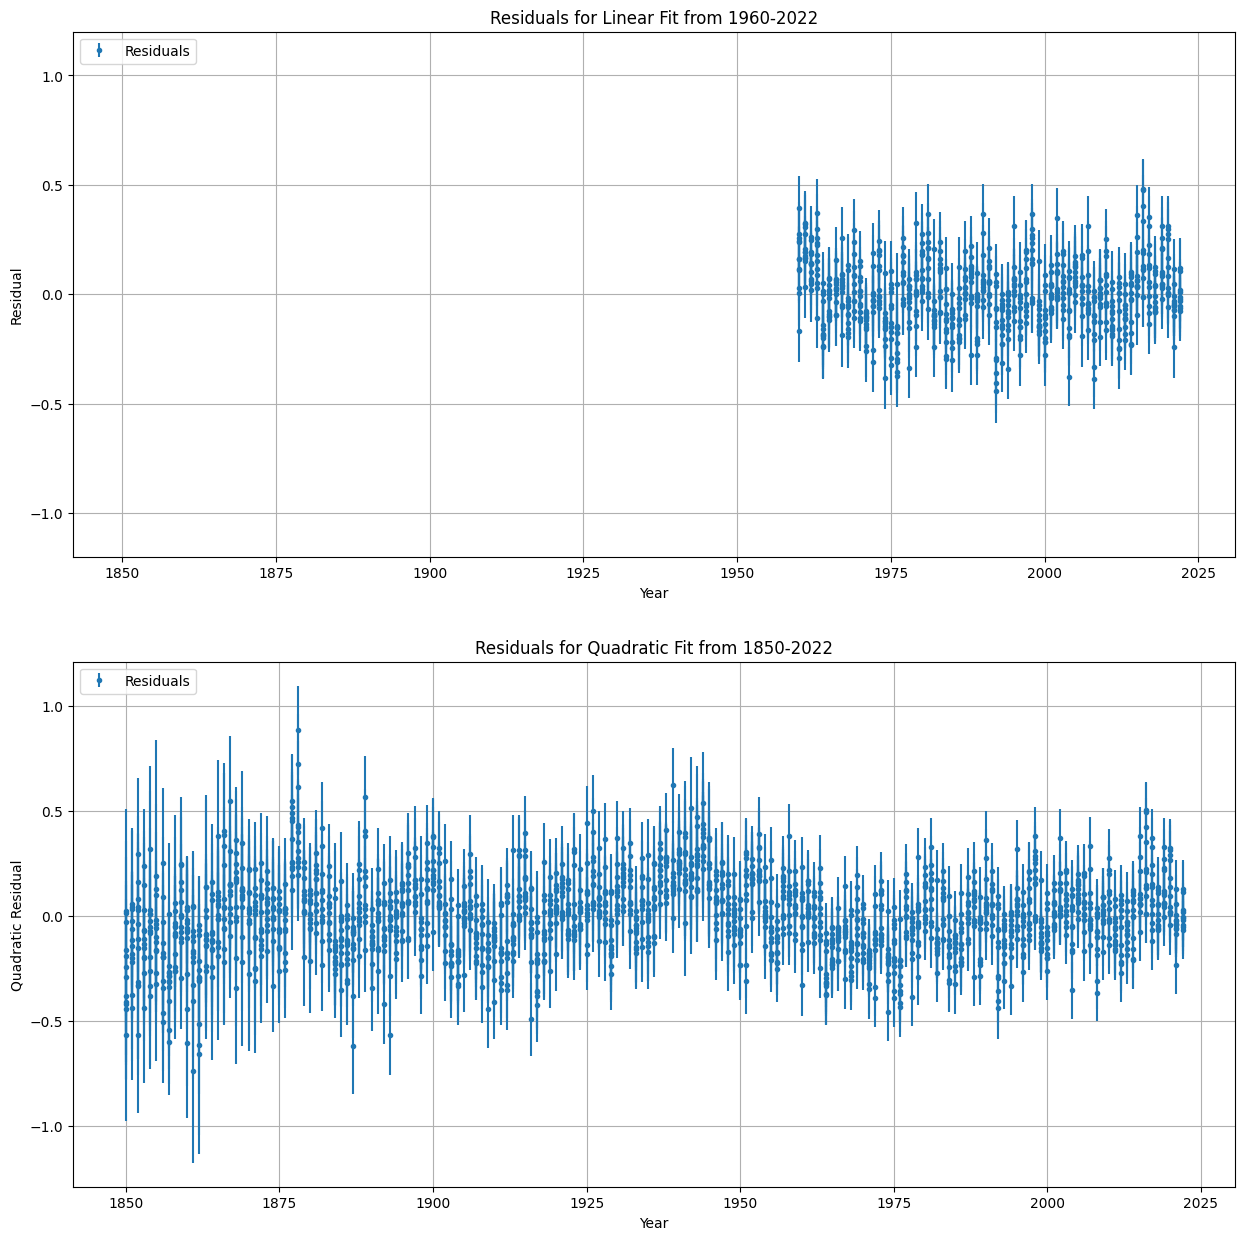

In [7]:
# find residuals between observed and theory 

def find_residuals(theory:pd.core.series.Series,observed:pd.core.series.Series)->pd.core.series.Series:
    return observed-theory
    
residuals_line=find_residuals(line(industrial_df.year,*poptl),industrial_df.temp)
residuals_quadratic=find_residuals(poly2d(df.year,*poptq),df.temp)

fig, (ax0, ax1)=plt.subplots(2,1)
fig.set_figheight(15)
fig.set_figwidth(15)

## first subplot
ax0.errorbar(industrial_df.year,residuals_line,yerr=industrial_df.total_error, fmt='.',label='Residuals')

step=25
xticks=df.year.unique()[::25]
xticks=np.append(xticks,[xticks.max()+25])
yticks=np.linspace(-1,1,5)
# print(df.iloc[::step, :])
ax0.set_xticks(xticks)
ax0.set_yticks(yticks)

ax0.set_title('Residuals for Linear Fit from 1960-2022')
ax0.set_xlabel('Year')
ax0.set_ylabel('Residual')
ax0.legend(loc=2)
ax0.grid('--')
ax0.set_xlim(1842,2031)
ax0.set_ylim(-1.2,1.2)


## second subplot
ax1.errorbar(df.year,residuals_quadratic,yerr=df.total_error, fmt='.',label='Residuals')
ax1.set_title('Residuals for Quadratic Fit from 1850-2022')
ax1.set_xticks(xticks)
ax1.set_xlabel('Year')
ax1.set_ylabel('Quadratic Residual')
ax1.legend(loc=2)
ax1.grid('--')




plt.show()

_____________________________________________
Part 5 observations: (will depend on range used for linear fit)

For the period, 1960-2022, it is difficult to compare the two sets of residuals. With such scrunched up data it is hard to tell just *how* much greater residuals are overall, much less the spread of these residuals. It would seem on first impression however that the range of the residuals for both is roughly the same, however for the quadratic fit more of the residuals are centered around the zero line. Furthermore, when we look at the overall time period for the quadratic fit, it would seem that before around 1950, the residuals have greater range and more spread, suggesting that the quadratic model of global temperature applies especially well to the post World War II period. 
________________________________________________________________

Part 6: (3 pts)

On a single plot show
- data with errorbars
- both fits projected out 100 years
- a horizontal line from 1850-1900 with the mean pre-industrial temperature
- a horizontal line at the 1951-1980 $T_{mean}$
- a horizontal line at $\Delta T = 2 \, ^{\circ}C$ above the pre-industrial temperature

put all appropriate labels, etc... on plot

_______________________________________________________________________

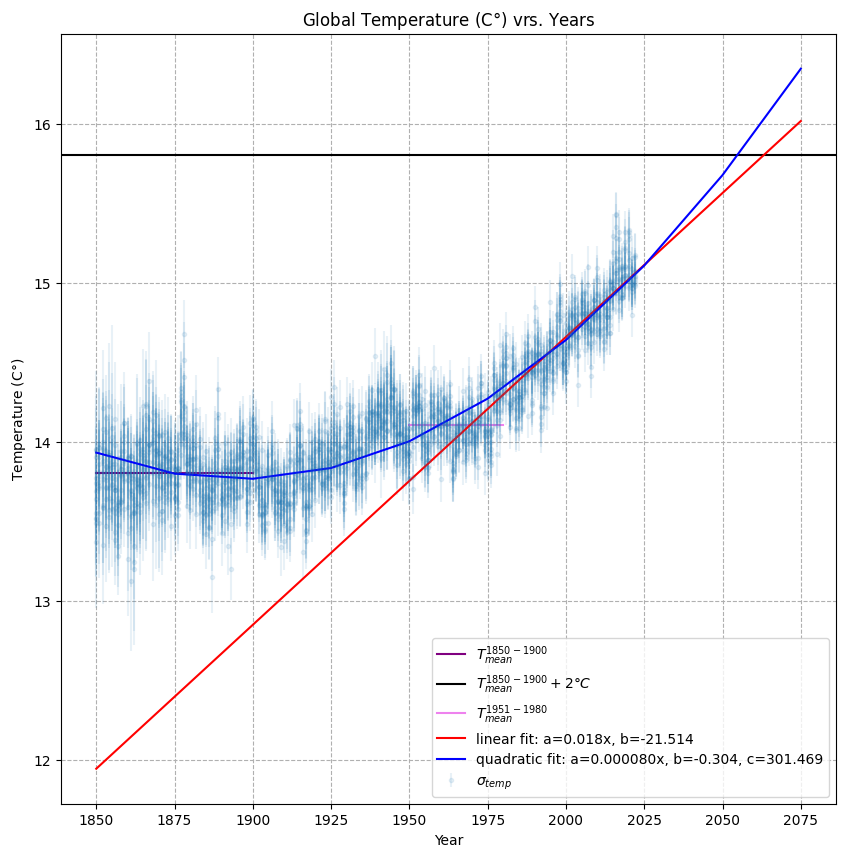

In [8]:

δT=2.0 

## pre industrial data
pre_industrial_df=df[(df.year>=1850) & (df.year<=1900)]
T_mean_pre=np.zeros(pre_industrial_df.shape[0])
T_mean_pre.fill(pre_industrial_df.temp.mean())

## post industrial data 
industrial_df=df[(df.year>=1950) & (df.year<=1980)]
T_mean_post=np.zeros(industrial_df.shape[0])
T_mean_post.fill(average_temp)


#### plot lines 
f = plt.figure()
#horizontal lines 
plt.plot(pre_industrial_df.year,T_mean_pre,label='$T_{mean}^{1850-1900}$',color='purple')
plt.axhline(pre_industrial_df.temp.mean()+δT,label='$T_{mean}^{1850-1900}+2\degree C$',color='black')
plt.plot(industrial_df.year,T_mean_post,label='$T_{mean}^{1951-1980}$',color='violet')
plt.errorbar(df.year,df.temp,yerr=df.total_error,fmt='.',label='$\sigma_{temp}$',alpha=.1)

years=df.year.unique()[::25]
years=np.append(xticks,[xticks.max()+25,xticks.max()+50])
plt.xticks(years)
plt.plot(years,line(years,*poptl),label='linear fit: a=%5.3fx, b=%5.3f'%tuple(poptl),color='red')
plt.plot(years,poly2d(years,*poptq),label='quadratic fit: a=%6fx, b=%5.3f, c=%5.3f'%tuple(poptq),color='blue')

plt.grid(linestyle='--')
plt.title('Global Temperature (C$\degree$) vrs. Years')
plt.xlabel('Year')
plt.ylabel('Temperature (C$\degree$)')
f.set_figwidth(10)
f.set_figheight(10)
plt.legend()
plt.show()


__________________________________________________________________________
Final Observations and Summary:


We tested two different hypotheses about global warming i.e. either that the secular increase in average global temperatures is linear or quadratic. In testing the linear fit to the post-1975 period we found that the fit was poor. Errors owed to chance around 3% of the time as determined by chi-square. However, the quadratic fit much better, in fact it was unbelievable how much better, since almost 90% of the time errors or deviations owed to chance alone as determined by chi-square. However, for the quadratic fit , we found that residuals were more centrally-located around zero for the post World-War II period but comparison between linear and quadratic residuals was not so obvious. 

Physically, between 1850-1900 we see that pollution probably acted as a shield for solar radiation therefore accounting for the slight decrease in average global temperatures. This also makes sense, since in that period coal was the dominant form of energy-supply, a substance when which burned relseases extremely dense black particulate matter (with high absorptivity). However, past 1900 , the pollution then acts like a hothouse or greehouse , significantly containing solar radiation which itself reflects back off this blanket of pollution. Since then we have seen an increase, although in a quadratic and non-linear fashion. The quadratic fit is a formal formal statement of the above sketched process for global warming.

A final excercise showed that we are able to predict when the putative fatal 2&deg;C mark will be reached. The Intergovernmental Panel on Climate Change has predicted that such an increase in average global temperatures will have devestating social and ecological consequences. At the current pace, the linear fit suggests we will attain that deadline by roughly 2075, but the quadratic by 2060. The quadratic should in some ways be taken as, between the alternatives, a worse case scenario and social planning should be done, taking in account the risk, on the basis of the quadratic fit. 
__________________________________________________________________________